<a href="https://colab.research.google.com/github/nikx-bot/SCT_DS_1/blob/main/barchart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Available files:
Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv
API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv
Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv


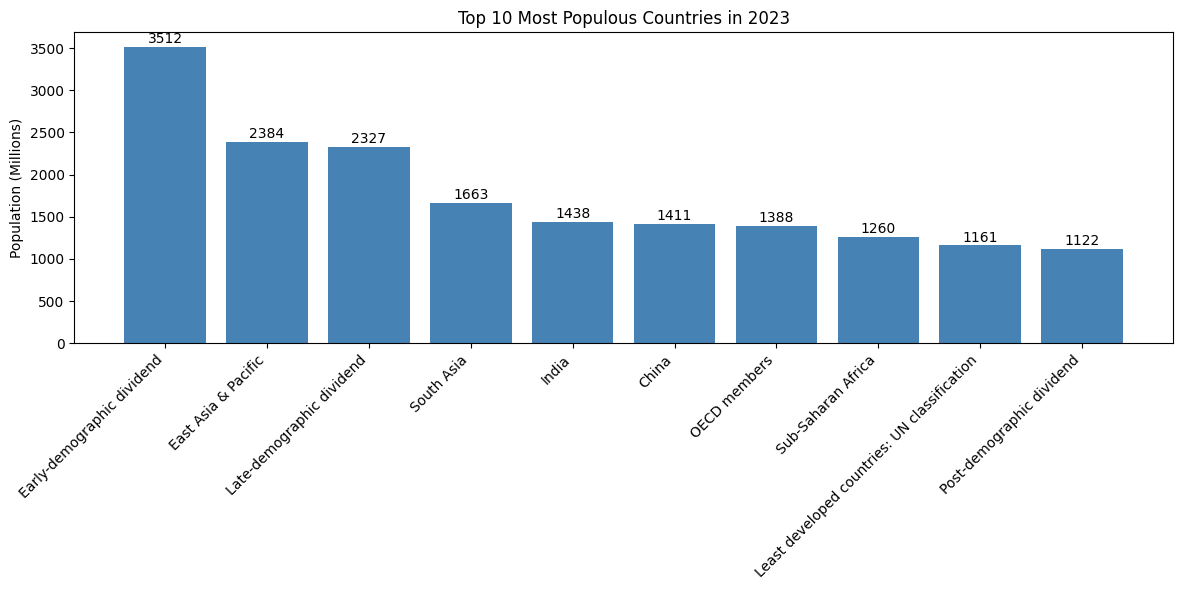

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import requests
import io

# STEP 1: Download ZIP from World Bank
url = "https://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv"
response = requests.get(url)

# STEP 2: Open the ZIP and list CSV files
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    print("Available files:")
    for f in z.namelist():
        print(f)

    # Choose the correct data file (usually the largest CSV)
    data_file = [f for f in z.namelist() if f.startswith("API_SP.POP.TOTL") and f.endswith(".csv")][0]

    # STEP 3: Read the correct CSV (skip metadata rows)
    with z.open(data_file) as f:
        df = pd.read_csv(f, skiprows=4)

# STEP 4: Filter and Clean for Year 2023
df_cleaned = df[['Country Name', '2023']].dropna()
df_cleaned.columns = ['Country', 'Population']
df_cleaned = df_cleaned[~df_cleaned['Country'].str.contains('income|IBRD|IDA|World|Euro|Arab', case=False)]
df_top10 = df_cleaned.sort_values(by='Population', ascending=False).head(10)

# STEP 5: Plot Bar Chart
plt.figure(figsize=(12, 6))
bars = plt.bar(df_top10['Country'], df_top10['Population'] / 1e6, color='steelblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Population (Millions)')
plt.title('Top 10 Most Populous Countries in 2023')

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10, f'{height:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

